# COVID-19 Data Analysis

In [202]:
import os
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

In [147]:
today = date.today()
data_dir = 'data'
us_data_dir = data_dir + '/us'
global_data_dir = data_dir + '/global'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)
if not os.path.exists(us_data_dir):
    os.mkdir(us_data_dir)
if not os.path.exists(global_data_dir):
    os.mkdir(global_data_dir)

for dir in [us_data_dir, global_data_dir]:
    file_list = [f for f in os.listdir(dir)]
    for f in file_list:
        if str(today) != str(f)[:len(str(today))]:
            os.remove(os.path.join(dir, f))

## Get John Hopkins Data from GitHub

In [148]:
def get_corona_data(case_type, scope):
    if not os.path.exists(f'./data/{scope}/{today}_{case_type}'):
        csv_url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{case_type}_{scope}.csv'
        df = pd.read_csv(csv_url)
        df.to_csv(f'./data/{scope}/{today}_{case_type}')

## Summary of Data

Get the amount of confirmed cases, deaths, and the fatality rate

In [149]:
def get_case_count(case_type, scope):
    df = pd.read_csv(f'./data/{scope}/{today}_{case_type}')
    count = df[df.columns[-1]].sum()
    return count

In [150]:
def fatality_rate(confirmed_cases, deaths):
    return round(deaths / confirmed_cases * 100, 2)

## US Data

In [151]:
get_corona_data('confirmed', 'US')
get_corona_data('deaths', 'US')
us_confirmed_cases = get_case_count('confirmed', 'US')
us_deaths = get_case_count('deaths', 'US')
us_fatality_rate = fatality_rate(us_confirmed_cases, us_deaths)

In [152]:
print('Confirmed Cases:', us_confirmed_cases)
print('Deaths:', us_deaths)
print(f'Fatality Rate: {us_fatality_rate}%')

Confirmed Cases: 699706
Deaths: 36773
Fatality Rate: 5.26%


## Global Data

In [153]:
get_corona_data('confirmed', 'global')
get_corona_data('deaths', 'global')
global_confirmed_cases = get_case_count('confirmed', 'global')
global_deaths = get_case_count('deaths', 'global')
global_fatality_rate = fatality_rate(global_confirmed_cases, global_deaths)

In [154]:
print('Confirmed Cases:', global_confirmed_cases)
print('Deaths:', global_deaths)
print(f'Fatality Rate: {global_fatality_rate}%')

Confirmed Cases: 2240190
Deaths: 153821
Fatality Rate: 6.87%


In [163]:
def get_df(case_type, scope):
    df = pd.read_csv(f'./data/{scope}/{today}_{case_type}')
    return(df.loc[:, '1/22/20':])

us_confirmed_ts = get_df('confirmed', 'us').sum()
us_deaths_ts = get_df('deaths', 'us').sum()

1/22/20         1
1/23/20         1
1/24/20         2
1/25/20         2
1/26/20         5
            ...  
4/13/20    580619
4/14/20    607670
4/15/20    636350
4/16/20    667801
4/17/20    699706
Length: 87, dtype: int64

In [206]:
daily_cases = np.array([us_confirmed_ts[i] - us_confirmed_ts[i-1] for i in range(1, len(us_confirmed_ts))])
daily_deaths = np.array([us_deaths_ts[i] - us_deaths_ts[i-1] for i in range(1, len(us_deaths_ts))])
x = np.arange(0, len(daily_cases))

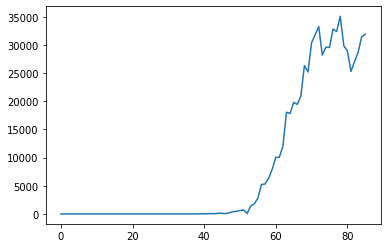

In [204]:
plt.plot(daily_cases)

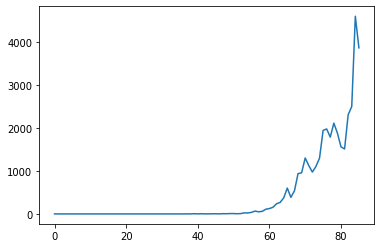

In [205]:
plt.plot(daily_deaths)